# Step 1: Import Required Libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the  Dataset

In [14]:
crop_dataset = pd.read_csv('Crop_recommendation.csv')
crop_dataset

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

**Data fields** <br/>
N - ratio of Nitrogen content in soil <br/>
P - ratio of Phosphorous content in soil <br/>
K - ratio of Potassium content in soil <br/>
temperature - temperature in degree Celsius <br/>
humidity - relative humidity in % <br/>
ph - ph value of the soil <br/>
rainfall - rainfall in mm <br/>

The dataset is in a special format. We convert it into a DataFrame for easier viewing.

# Step 3: Prepare the Data

In [17]:
X = crop_dataset.drop('label', axis=1)  # Features (inputs), dropping the 'label' column
y = crop_dataset['label']            # Target (output labels)


print("\n✅ Data has been prepared for training.")


✅ Data has been prepared for training.


In [18]:
X

N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]

In [6]:
X = data[iris.feature_names]  # Features (inputs)
y = data['target']            # Target (output labels: 0, 1, or 2)

# Step 4: Split the Data into Train and Test Sets

We use 70% for training, 30% for testing

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
print("\n✅ Data has been split into training and testing sets.")


✅ Data has been split into training and testing sets.


# Step 5: Train a Model (Random Forest Classifier)

In [20]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:

print("📈 Model training complete.")

📈 Model training complete.


# Step 6: Make Predictions on the Test Set

In [22]:
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Model Accuracy on Test Set: {accuracy:.2f}")


🎯 Model Accuracy on Test Set: 0.99


# Step 8: Show Sample Predictions

In [39]:
print("\n🔍 Sample Predictions (first 5):")
for i in range(5):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")


🔍 Sample Predictions (first 5):
Actual: muskmelon, Predicted: muskmelon
Actual: watermelon, Predicted: watermelon
Actual: papaya, Predicted: papaya
Actual: papaya, Predicted: papaya
Actual: apple, Predicted: apple



📊 Confusion Matrix:


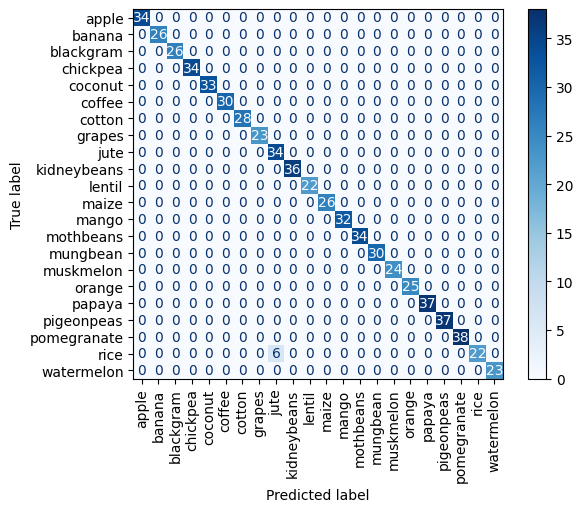


Target variable (y) data type: object


In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

print("\n📊 Confusion Matrix:")
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

print(f"\nTarget variable (y) data type: {y.dtype}")

# Step 9: Prediction with new data

In [37]:
prediction_cropData = pd.read_csv('prediction_cropdata.csv')
prediction_cropData

N       P       K  temperature  humidity    ph  rainfall
0   87.68   52.25  178.82        37.65     75.49  7.68    248.15
1   40.71   19.48   29.14        16.30     18.86  4.33     85.41
2   70.34   25.99  181.82        14.46     67.73  3.76     83.70
3  123.45   60.99   10.72        37.76     73.22  8.23    197.67
4  133.03  140.24  129.80        17.40     97.19  7.14     85.25

In [38]:
# Separate features from the prediction data (assuming it has the same structure as the training data)
X_predict = prediction_cropData # Use the prediction_cropData directly as it doesn't have the 'label' column

# Use the trained model to predict the labels
predicted_labels = model.predict(X_predict)

# Add the predicted labels to the prediction_cropData DataFrame
prediction_cropData['predicted_label'] = predicted_labels

print("Predictions on prediction_cropData:")
display(prediction_cropData)

Predictions on prediction_cropData:


N       P       K  temperature  humidity    ph  rainfall  \
0   87.68   52.25  178.82        37.65     75.49  7.68    248.15   
1   40.71   19.48   29.14        16.30     18.86  4.33     85.41   
2   70.34   25.99  181.82        14.46     67.73  3.76     83.70   
3  123.45   60.99   10.72        37.76     73.22  8.23    197.67   
4  133.03  140.24  129.80        17.40     97.19  7.14     85.25   

  predicted_label  
0            rice  
1     kidneybeans  
2        chickpea  
3          coffee  
4          banana